In [ ]:
# fait le 23/02/2025

In [5]:
# import Numpy, matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# génération données aléatoire
from sklearn.datasets import make_regression

In [9]:
# dataset
x, y = make_regression(n_samples=100, n_features=1, noise = 10)

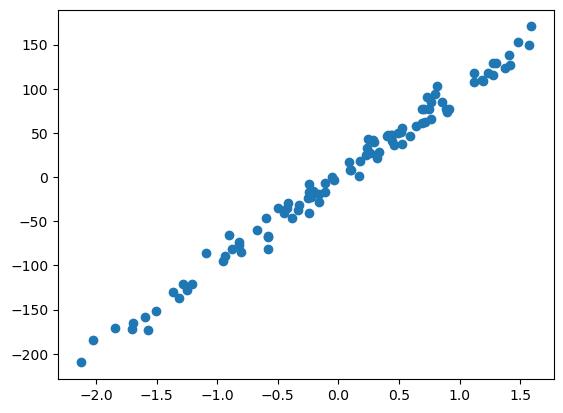

In [11]:
# voir dataset
plt.scatter(x, y)

In [17]:
# vérification des matrices
print(x.shape)
# modifier dimension
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [25]:
# matrice X
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)
print(X)

(100, 2)
[[-0.23011678  1.        ]
 [ 1.19271336  1.        ]
 [-1.69214043  1.        ]
 [ 1.18159115  1.        ]
 [-0.23978253  1.        ]
 [-1.50464183  1.        ]
 [ 0.10631368  1.        ]
 [ 0.24145106  1.        ]
 [-0.2454326   1.        ]
 [ 0.70805357  1.        ]
 [ 0.6396919   1.        ]
 [ 0.4107503   1.        ]
 [ 0.51542871  1.        ]
 [-0.89898549  1.        ]
 [-0.58413038  1.        ]
 [-0.11301312  1.        ]
 [ 0.76488841  1.        ]
 [-0.38581757  1.        ]
 [ 0.52354055  1.        ]
 [ 1.4145716   1.        ]
 [-0.49928583  1.        ]
 [ 0.39775317  1.        ]
 [-1.69999226  1.        ]
 [ 1.27442368  1.        ]
 [-0.32726526  1.        ]
 [ 0.28404167  1.        ]
 [-0.24323369  1.        ]
 [ 0.4914768   1.        ]
 [ 0.4623663   1.        ]
 [-0.04023729  1.        ]
 [ 0.74518088  1.        ]
 [ 1.23055428  1.        ]
 [ 0.4353423   1.        ]
 [ 0.08651638  1.        ]
 [-0.20449267  1.        ]
 [-0.95197054  1.        ]
 [ 0.4453083   1.  

In [27]:
# initialisation vecteur Theta
theta = np.random.randn(2, 1)
print(theta)

[[-0.06233612]
 [-0.22322346]]


In [29]:
# Modèle linéaire
def model(X, theta):
    return X.dot(theta)

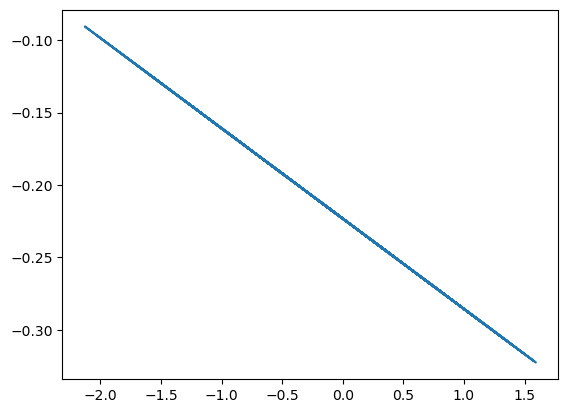

In [33]:
# test model
plt.plot(x, model(X, theta))

In [35]:
# fonction coût
def cost_function(X, y, theta):
    m = len(y) # longeur du vecteur y
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [37]:
# tester fonction coût
cost_function(X, y, theta)

3874.8086990824568

In [41]:
# Gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [57]:
# descente de Gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [61]:
# theta final (entraînement)
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

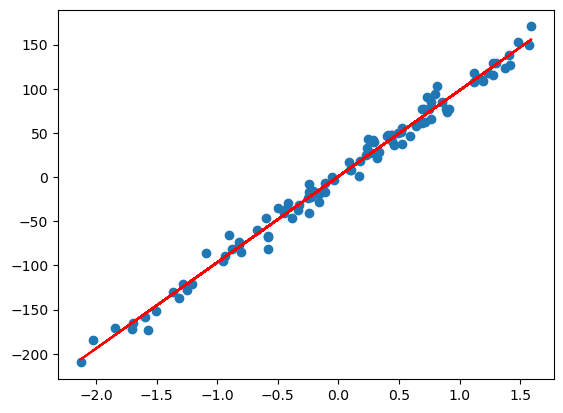

In [63]:
# check
predictions = model(X, theta_final)
# affichage
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

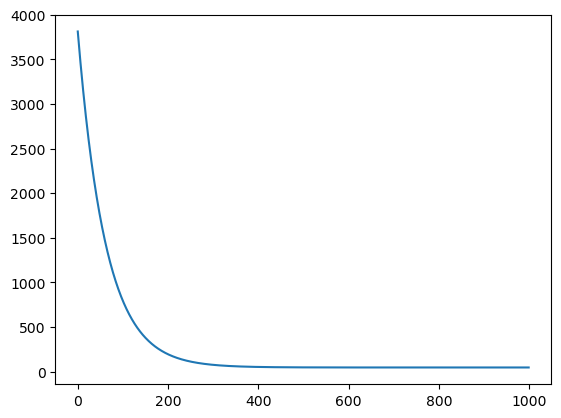

In [65]:
# courbe d'apprentissage
plt.plot(range(1000), cost_history)

In [75]:
# coefficient de détermination (performance du modèle)
def coef_determination(y, pred):
    u = ((y -pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [77]:
coef_determination(y, predictions)

0.9882872624995492